# 5: Bivariate distributions


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


## Discrete bivariate distributions
### Range and histogram of a joint pmf 

The range and the histogram of the joint pmf of rolling a dice and recording the larger value as $X$ and the smaller value as $Y$. The blue dot is the point $(\mu_X,\mu_Y)$ and it is the center of the joint distribution.

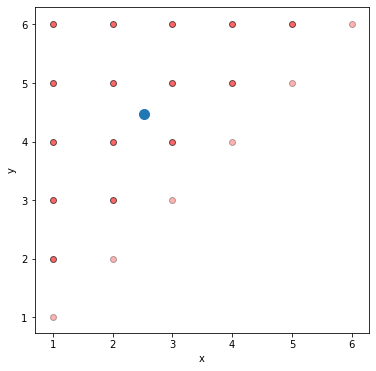

In [1]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))

xmean=0
for x in range(1,7):
    xmean = xmean + x*(1/36+2*(6-x)/36)  

ymean=0
for y in range(1,7):
    ymean = ymean + y*(1/36+2*(y-1)/36)   


x_range = []
y_range = []
z_val = []
for y in range(1,7):
    plt.scatter(y,y, color="red", edgecolor="black",alpha=0.3)
    x_range.append(y)
    y_range.append(y)
    z_val.append(2/36)
    for x in range(1,y):
        x_range.append(x)
        y_range.append(y)
        z_val.append(1/36)
        plt.scatter(x,y, color="red", edgecolor="black",alpha=0.6)
        
        
plt.scatter(xmean, ymean, s=100 )        
plt.xlabel("x")
plt.ylabel("y")

plt.show();

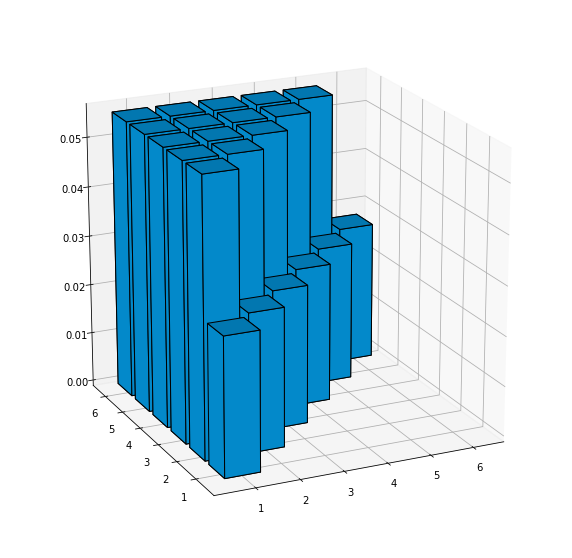

In [2]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x_range = []
y_range = []
z_val = []
for y in range(1,7):
    x_range.append(y)
    y_range.append(y)
    z_val.append(1/36)
    for x in range(1,y):
        x_range.append(x)
        y_range.append(y)
        z_val.append(2/36)
        
x_cord = np.array(x_range)
y_cord = np.array(y_range)
z_cord = np.zeros(y_cord.shape)
x_width = np.ones(y_cord.shape)*0.8
y_width = np.ones(y_cord.shape)*0.8
z_height = np.array(z_val)        
ax.bar3d(x_cord-0.5, y_cord-0.5, z_cord, x_width, y_width, z_height, 
         shade=True, alpha=1, color='#039be5', edgecolor='black')
ax.view_init(20,-90-25)

plt.show();

### The range of the trinomial distribution

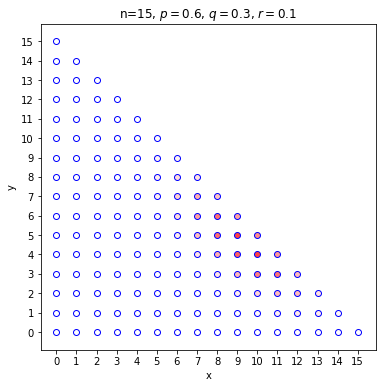

In [19]:
# nbi:hide_in
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
plt.figure(figsize=(6,6)) 


n=15
pS=6/10
pI=3/10
pF=1/10

x_range = []
y_range = []
for x in range(n+1):
    for y in range(n-x+1):
        alpha = comb(n, x, exact=True) *comb(n-x, y, exact=True) * pS**x * pI**y * pF**(n-x-y)
        plt.scatter(x,y, edgecolor="blue", color=(1,0,0,alpha*10))

plt.xticks(np.arange(0,n+1,1))
plt.yticks(np.arange(0,n+1,1))
plt.title(r"n={}, $p=${}, $q=${}, $r=${}".format(n,pS,pI, pF))
plt.xlabel("x")
plt.ylabel("y")

plt.show();

### Least squares line fits a line into the distribution

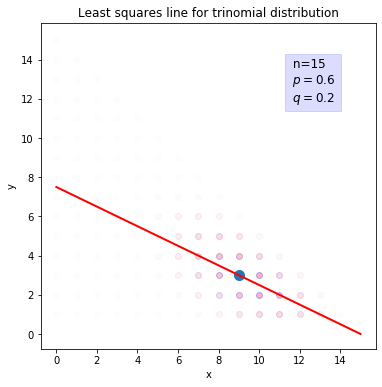

In [22]:
# nbi:hide_in
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
plt.figure(figsize=(6,6)) 


n=15
pS=6/10
pI=2/10
pF=2/10

meanx=n*pS
meany=n*pI

x_range = []
y_range = []
for x in range(n):
    for y in range(1,n-x+1):
        alpha = comb(n, x, exact=True) *comb(n-x, y, exact=True) * pS**x * pI**y * pF**(n-x-y)
        plt.scatter(x,y, edgecolor=(0,0,1,max(min(alpha*5,0.9),0.01)), color=(1,0,0,max(min(alpha*5,0.9),0.01)))

xval=np.linspace(0, n, 100)
yval = (n-xval)*pI/(1-pS)
plt.plot(xval,yval, color="red", linewidth=2)
plt.scatter(meanx, meany, s=100 )   
#plt.xticks(np.arange(0,n,1))
#plt.yticks(np.arange(0,n,1))
plt.title("Least squares line for trinomial distribution")
plt.figtext(0.7,0.8, " n={}\n".format(n)+r" $p=${}".format(pS)+"\n"+
            r" $q=${}".format(pI), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
plt.xlabel("x")
plt.ylabel("y")

plt.show();

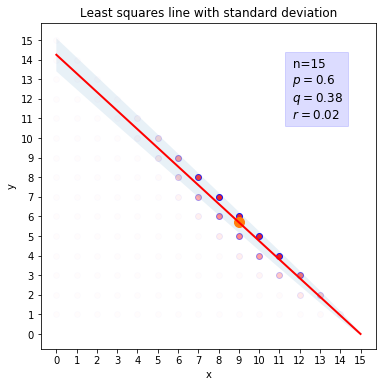

In [25]:
# nbi:hide_in
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
plt.figure(figsize=(6,6)) 


n=15
pS=0.6
pI=0.38
pF=0.02

meanx=n*pS
meany=n*pI

x_range = []
y_range = []
for x in range(n):
    for y in range(1,n-x+1):
        alpha = comb(n, x, exact=True) *comb(n-x, y, exact=True) * pS**x * pI**y * pF**(n-x-y)
        plt.scatter(x,y, edgecolor=(0,0,1,max(min(alpha*10,0.9),0.01)), color=(1,0,0,max(min(alpha*10,0.9),0.01)))
        
def std(xval):
    var = (n-xval)*pI*pF/(1-pS)**2
    std = np.power(var,1/2)
    return std

xval=np.linspace(0, n, 100)
yval = (n-xval)*pI/(1-pS)
plt.fill_between(xval, yval-std(xval), yval+std(xval), alpha=0.1)
plt.plot(xval,yval, color="red", linewidth=2)
plt.scatter(meanx, meany, s=100 )   
plt.xticks(np.arange(0,n+1,1))
plt.yticks(np.arange(0,n+1,1))
plt.title("Least squares line with standard deviation")
plt.figtext(0.7,0.8, " n={}\n".format(n)+r" $p=${}".format(pS)+"\n"+
            r" $q=${}".format(pI)+"\n"+r" $r=${}".format(pF), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
plt.xlabel("x")
plt.ylabel("y")



plt.show();

## Continuous bivariate distributions

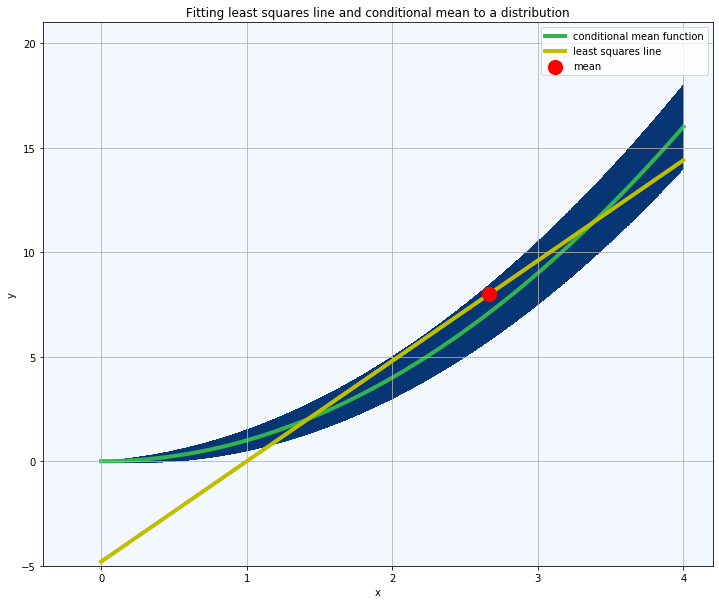

In [2]:
# nbi:hide_in
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,10)) 

meanx=8/3
meany=8
varx=8/9
cov = 64/15

def pdf(X,Y):
    Z = np.zeros(X.shape)    
    cond = (0<=X) & (X<=4) & (-X/2<=Y-X**2) & (Y-X**2<=X/2)
    Z[cond] = 1/8
    return Z

x = np.linspace(-0.4, 4.2, 2000)
y = np.linspace(-5, 21 , 2000)

X, Y = np.meshgrid(x, y)
Z = pdf(X, Y)

plt.contourf(X, Y, Z, 20,  cmap = "Blues")
cb=plt.colorbar()
cb.remove()

xval = np.linspace(0, 4, 100)
plt.plot(xval,xval**2, linewidth=4, label="conditional mean function", color=(0.2,0.7,0.3), zorder=1)
yval = (xval-meanx)*cov/varx + meany
plt.plot(xval,yval,   linewidth=4, label="least squares line", color="y", zorder=2)
plt.scatter(meanx, meany, color = "red", s=200 , label ="mean", zorder=3)  

plt.grid(True)
plt.legend()
plt.title("Fitting least squares line and conditional mean to a distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.draw()


        

